In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [79]:
df = pd.read_csv("medical_examination.csv")

In [80]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [82]:
df['overweight'] = ((df["weight"] / (df["height"] / 100) ** 2) > 25).astype(int)

In [83]:
def normalize(x):
    if x==0:
        x= "good"
    elif x==1:
        x = "bad"
    return x

In [84]:
df["smoke"] =  df["smoke"].apply(normalize)
df["alco"] =  df["alco"].apply(normalize)
df["active"] =  df["active"].apply(normalize)
df["cardio"] =  df["cardio"].apply(normalize)
df["overweight"] =  df["overweight"].apply(normalize)

In [85]:
def gluc_cholesterol(x):
    if x==1:
        x= 0
    elif x>1:
        x = 1
    return x

In [86]:
df["gluc"] =  df["gluc"].apply(gluc_cholesterol)
df["cholesterol"] =  df["cholesterol"].apply(gluc_cholesterol)

In [87]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,good,good,bad,good,good
1,1,20228,1,156,85.0,140,90,1,0,good,good,bad,bad,bad
2,2,18857,1,165,64.0,130,70,1,0,good,good,good,bad,good
3,3,17623,2,169,82.0,150,100,0,0,good,good,bad,bad,bad
4,4,17474,1,156,56.0,100,60,0,0,good,good,good,good,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,bad,good,bad,good,bad
69996,99995,22601,1,158,126.0,140,90,1,1,good,good,bad,bad,bad
69997,99996,19066,2,183,105.0,180,90,1,0,good,bad,good,bad,bad
69998,99998,22431,1,163,72.0,135,80,0,1,good,good,good,bad,bad


<Axes: xlabel='value', ylabel='count'>

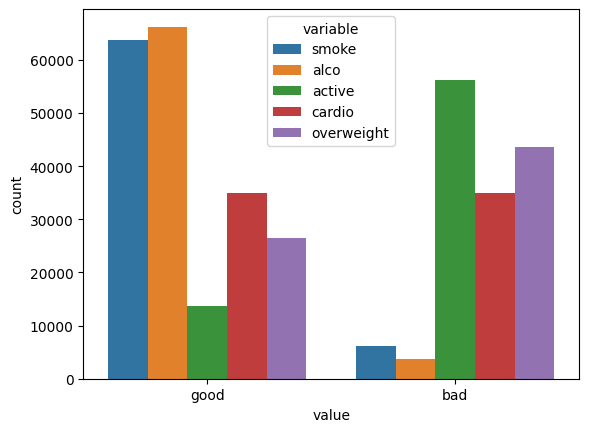

In [88]:
sns.countplot(data=df.melt(value_vars=['smoke', 'alco',"active","cardio","overweight"]), x='value', hue='variable')

In [89]:
df_cat = pd.melt(df, id_vars= "cardio",value_vars=["smoke","alco","active","cardio","overweight"])
df_cat

,cardio,variable,value
0,good,smoke,good
1,bad,smoke,good
2,bad,smoke,good
3,bad,smoke,good
4,good,smoke,good
...,...,...,...
279995,good,overweight,bad
279996,bad,overweight,bad
279997,bad,overweight,bad
279998,bad,overweight,bad


In [90]:
# Agrupar por 'cardio', 'variable' y 'value' y contar las ocurrencias
df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index=False).size()

# Renombrar la columna de conteo a 'total'
df_cat = df_cat.rename(columns={'size': 'total'})

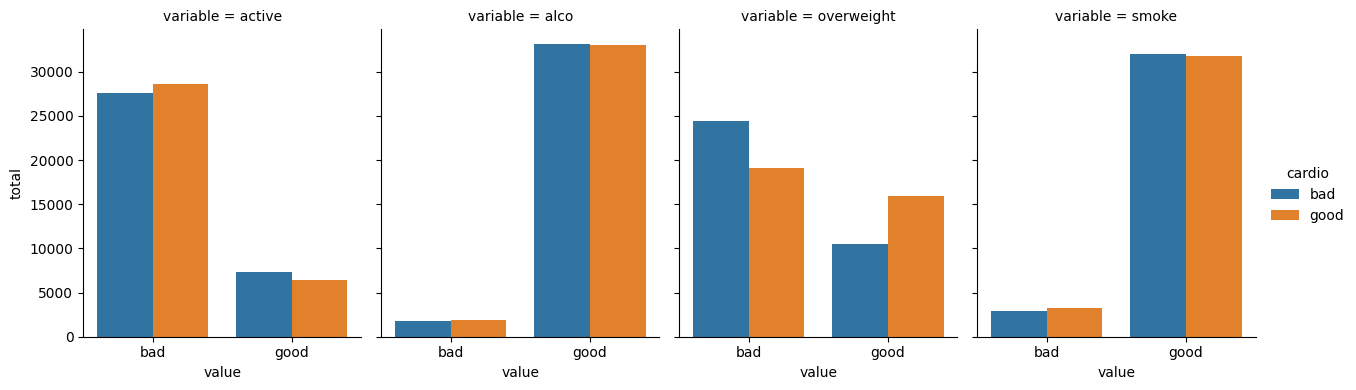

In [91]:
fig = sns.catplot(
    data=df_cat,
    x='value', 
    y='total',
    hue='cardio', 
    col='variable',
    kind='bar',
    height=4,
    aspect=0.8
)


In [92]:
fig.savefig("grafico_categorias.png")

In [93]:
df_heat = pd.read_csv("medical_examination.csv")[
    (df['ap_lo'] <= df['ap_hi']) &  
    (df['height'] >= df['height'].quantile(0.025)) &  
    (df['height'] <= df['height'].quantile(0.975)) &  
    (df['weight'] >= df['weight'].quantile(0.025)) &  
    (df['weight'] <= df['weight'].quantile(0.975))    
]

In [95]:
corr = df_heat.corr()
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.005581,0.002242,-0.002732,-0.000708,0.005891,0.003900
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.154642,0.097646,-0.044371,-0.026970,-0.011445,0.240241
sex,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.038756,-0.023419,0.337436,0.168637,0.007864,0.002320
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.065980,-0.028364,0.187830,0.089785,-0.005661,-0.024102
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.137705,0.094133,0.056533,0.059917,-0.014430,0.170042
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.021499,0.010226,-0.001928,0.000769,-0.000222,0.050556
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.154348,0.067048,0.023275,0.033042,0.001569,0.327181
cholesterol,0.005581,0.154642,-0.038756,-0.065980,0.137705,0.021499,0.154348,1.000000,0.451388,0.005696,0.031050,0.007381,0.219090
gluc,0.002242,0.097646,-0.023419,-0.028364,0.094133,0.010226,0.067048,0.451388,1.000000,-0.010225,0.005805,-0.007709,0.087621
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.005696,-0.010225,1.000000,0.341200,0.026940,-0.020345


In [96]:
mask = np.triu(np.ones_like(corr, dtype=bool))

<Axes: >

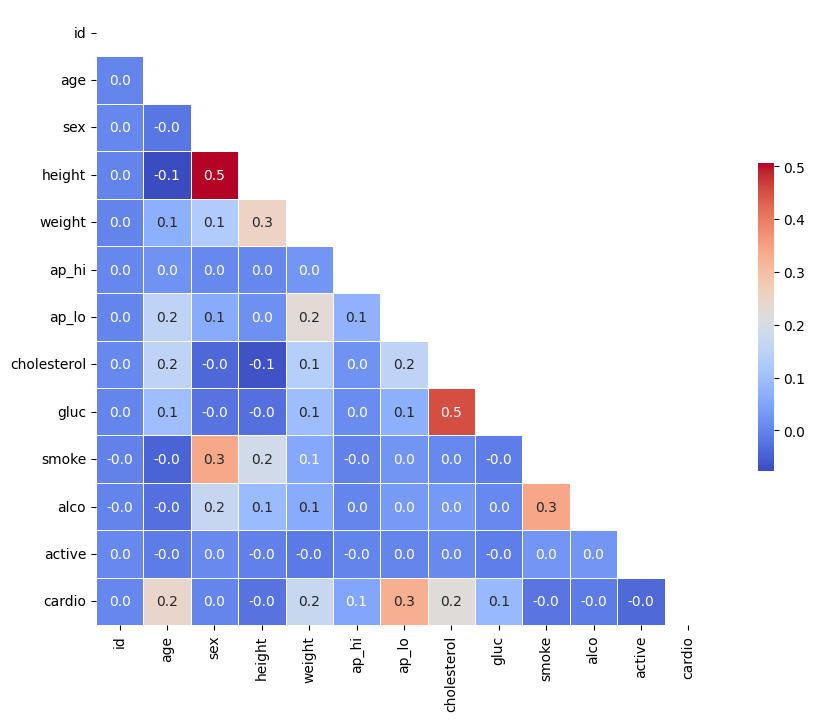

In [97]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(
        corr, 
        mask=mask, 
        annot=True, 
        fmt=".1f", 
        cmap="coolwarm", 
        linewidths=0.5, 
        square=True, 
        cbar_kws={'shrink': 0.5}
    )